<a href="https://colab.research.google.com/github/Preetjatania/skills-introduction-to-github/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing packages
!pip install kmodes # Install the kmodes library for k-prototypes clustering
import warnings
warnings.filterwarnings("ignore") # Ignore warnings
import numpy as np # Import numpy for numerical operations
import pandas as pd # Import pandas for data manipulation and analysis
from sklearn.preprocessing import StandardScaler # Import StandardScaler for normalizing numerical data
####################################
from kmodes.kprototypes import KPrototypes   # We will use the k-prototypes algorithm
####################################
from matplotlib import pyplot as plt # Import pyplot for plotting

# change variable names
url = "https://raw.githubusercontent.com/zoutianxin1992/MarketingAnalyticsPython/main/Marketing%20Analytics%20in%20Python/2024/assignment%201/2024Q1_CreditCardBehavior.csv"
df = pd.read_csv(url,index_col=0) # Load the dataset from the URL into a pandas DataFrame, using the first column as the index
df = df.rename(columns = {"GENDER": "gender",
    "BALANCE": "balance",
    "PURCHASES": "purchases",
    "CREDIT_LIMIT": "credit_limit",
    "PAYMENTS": "payments",
    "PRC_FULL_PAYMENT": "prc_full_payment"})



In [ ]:
scaler = StandardScaler() # Initialize StandardScaler
numerical_cols = ["balance", "purchases", "credit_limit", "payments", "prc_full_payment"] # Define numerical columns
df_normalized = df.copy() # Create a copy of the DataFrame
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols]) # Normalize the numerical columns
display(df_normalized.describe().loc[['mean', 'std']]) # Display the mean and standard deviation of the normalized data

# "\" breaks a line into multiple lines. There shouldn't be any spaces after "\"
df_normalized.head() # Display the first few rows of the normalized DataFrame

,balance,purchases,credit_limit,payments,prc_full_payment
mean,2.842171e-17,5.684342e-17,-9.237056e-17,7.105427e-18,3.552714e-18
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00


,gender,balance,purchases,credit_limit,payments,prc_full_payment
CUST_ID,,,,,,
1,M,-0.760651,-0.510300,-1.195450,-0.564213,-0.556952
2,M,0.079316,-0.329424,0.223800,-0.470525,-0.556952
3,M,-0.140115,-0.135723,0.223800,-0.605067,-0.556952
4,M,-0.102798,-0.179949,-1.020773,-0.321090,-0.556952
5,M,-0.553026,1.356606,1.533877,0.811564,2.518587


Text(0.5, 0, 'number of clusters')

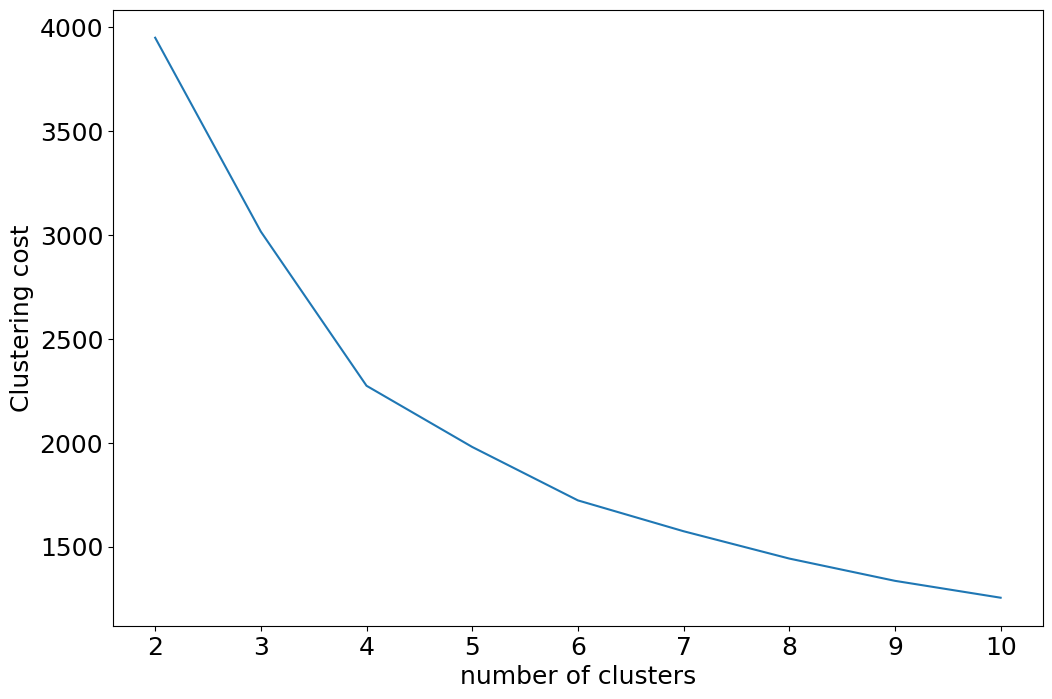

In [ ]:
# calculate clustering cost (comparable to SSE) for different k's, and store them in a vector

K = 10  # K is the maximum number of clusters we will check
store_cost = np.zeros(K-1)    # create a vector to store the clustering "cost", which is comparable to SSE in k-means. k is between 2 and K.
####################################
for k in range(2, K+1):                                   # try k from 2 to K
    kprotoSpec = KPrototypes(n_clusters = k, n_init = 20)                        # set up k-mean model with k clusters
####################################
    kproto_result = kprotoSpec.fit(df_normalized, categorical = [0])               # run k-mean on normalized data
    kproto_prediction = kproto_result.labels_                 # the predicted segments for consumers
################################
    store_cost[k-2] = kproto_result.cost_         # store the clustering cost
####################################
store_cost

# plot elbow chart


plt.rcParams['figure.figsize'] = [12,8]  # set figure size to be 12*8 inch
plt.plot(range(2, K+1), store_cost) # Plot the clustering cost against the number of clusters (k)
plt.xticks(range(2, K+1), fontsize = 18) # Set x-axis ticks to be the number of clusters
plt.yticks(fontsize = 18) # Set y-axis tick font size
plt.ylabel("Clustering cost",fontsize = 18) # Set the label for the y-axis
plt.xlabel("number of clusters", fontsize = 18) # Set the label for the x-axis

In [ ]:
kprotoSpec = KPrototypes(n_clusters = 4, n_init = 20)  # setup the k-mean model specs with 4 clusters (based on the elbow chart) and 20 initializations
kproto_result = kprotoSpec.fit(df_normalized,categorical = [0])    # apply the above model to the normalized data, specifying the index of the categorical column, and store the result

In [ ]:
df["segment"] = kproto_result.labels_ # Add a new column named "segment" to the original DataFrame, storing the predicted cluster label for each customer
df.head() # Display the first few rows of the DataFrame with the new segment column

,gender,balance,purchases,credit_limit,payments,prc_full_payment,segment
CUST_ID,,,,,,,
1,M,41.025602,104.940,1000,183.361960,0.0,1
2,M,2298.240072,850.487,7500,603.865016,0.0,1
3,M,1708.570753,1648.900,7500,0.000000,0.0,1
4,M,1808.851927,1466.608,1800,1274.574971,0.0,1
5,M,598.969225,7800.111,13500,6358.267065,1.0,0


In [ ]:
# summarize  variables

summary_table = df.groupby("segment").aggregate({ # Group the DataFrame by the "segment" column and calculate aggregate statistics
####################################
    "gender": lambda x: x[x == "M"].count()/x.count(),   # For the "gender" column, calculate the proportion of male consumers in each segment using a lambda function
####################################
    "balance":["mean"],
    "purchases": ["mean"],
    "credit_limit": ["mean"],
    "payments": ["mean"],
    "prc_full_payment": ["mean"],
    "segment": "count" # For the "segment" column, count the number of consumers in each segment
}
)
summary_table # Display the resulting summary table

,gender,balance,purchases,credit_limit,payments,prc_full_payment,segment
,<lambda>,mean,mean,mean,mean,mean,count
segment,,,,,,,
0,0.550296,260.367894,2762.331195,8157.218935,2828.061024,0.836443,169
1,0.506390,1307.405676,1190.245564,4403.514377,1340.032094,0.044009,626
2,0.636364,6292.187906,31833.076000,17727.272727,29400.503882,0.549242,11
3,0.402062,5945.593281,3331.158691,11055.927835,5543.889265,0.031654,194


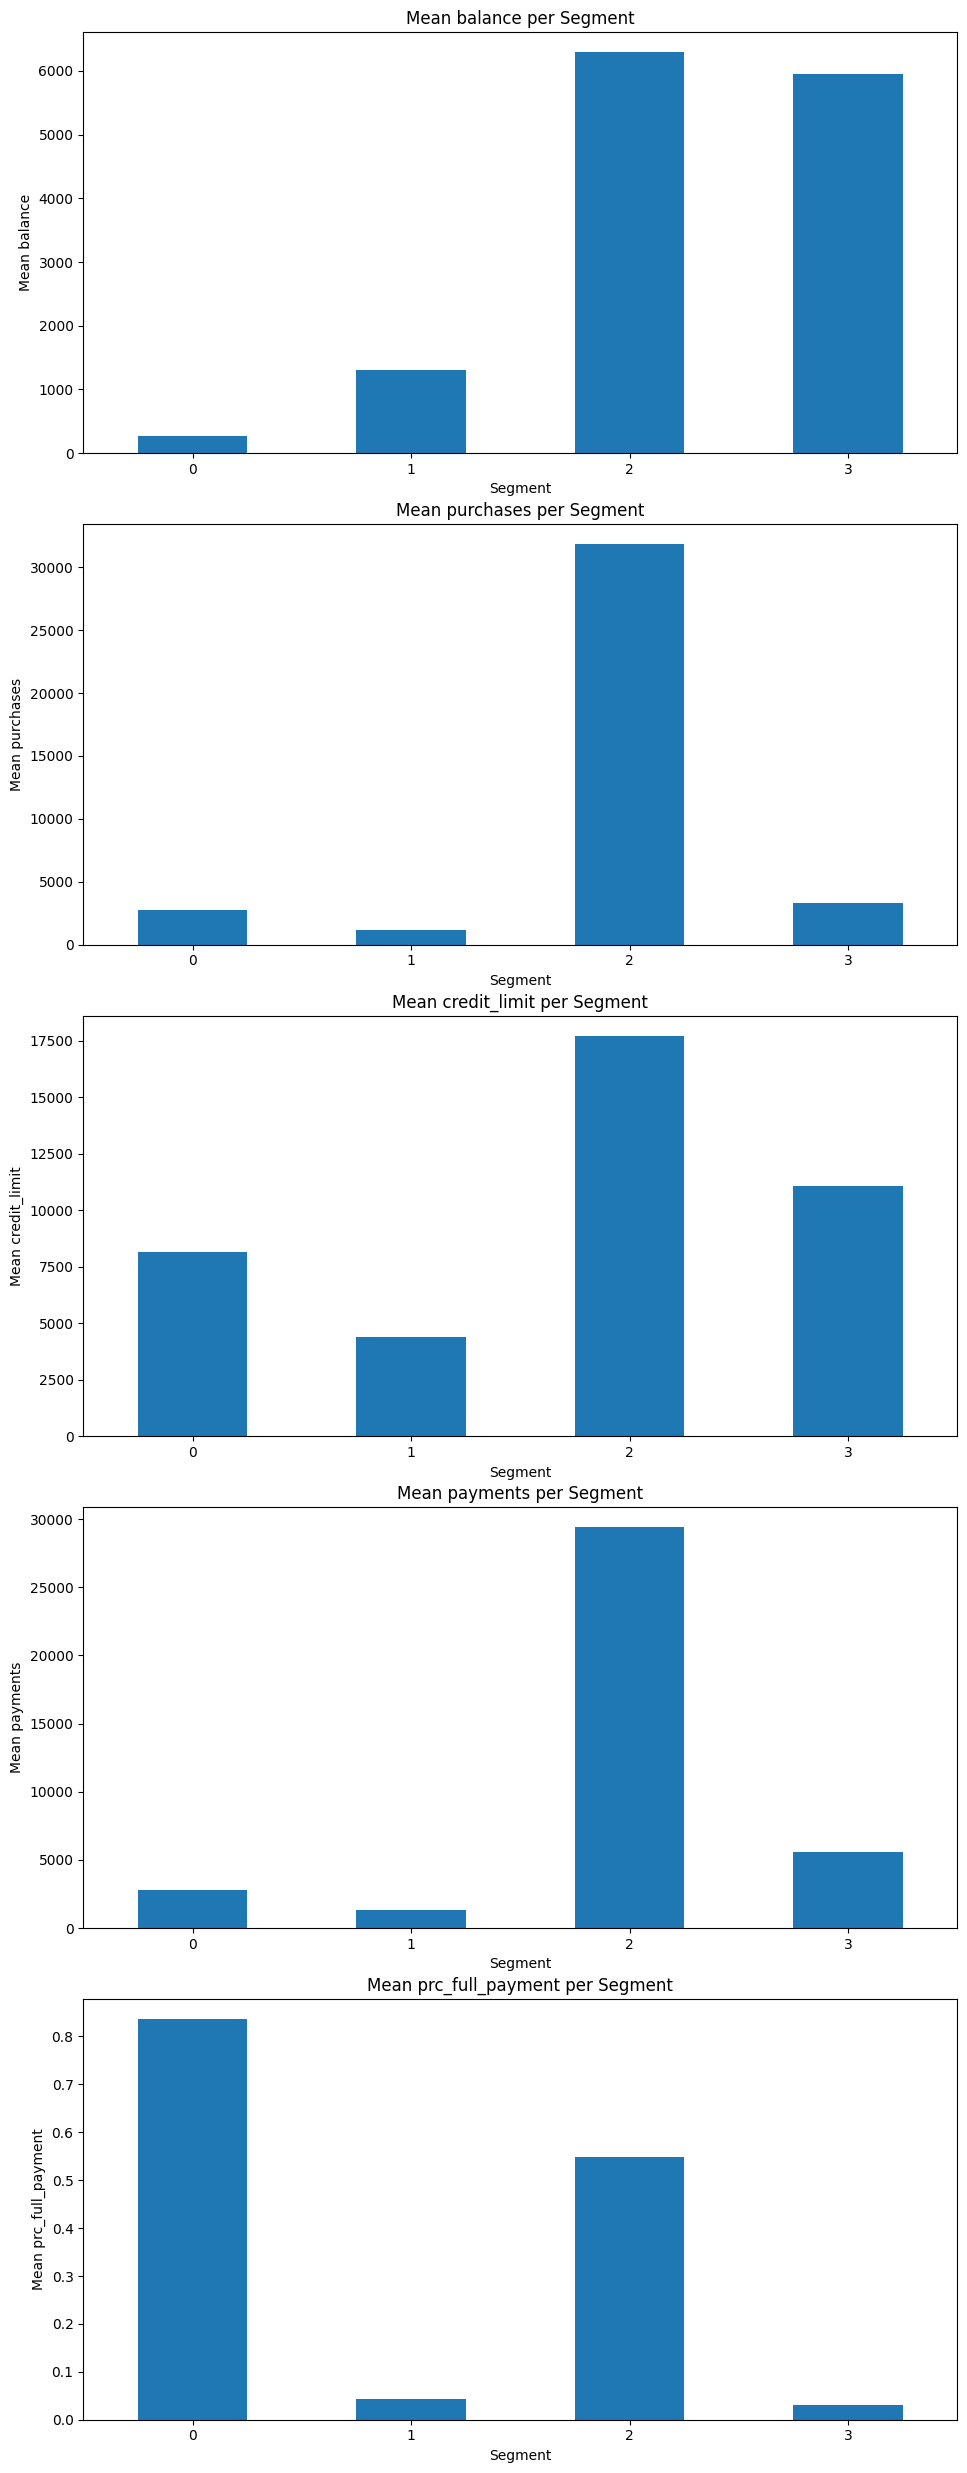

In [ ]:
# Visualize the summary table
summary_table_means = summary_table.loc[:, summary_table.columns.get_level_values(1) == 'mean']

fig, axes = plt.subplots(nrows=len(summary_table_means.columns), ncols=1, figsize=(10, 5 * len(summary_table_means.columns)))
fig.tight_layout(pad=3.0)

for i, col in enumerate(summary_table_means.columns):
    summary_table_means[col].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Mean {col[0]} per Segment')
    axes[i].set_xlabel('Segment')
    axes[i].set_ylabel(f'Mean {col[0]}')
    axes[i].tick_params(axis='x', rotation=0)

plt.show()

# You could also visualize the gender distribution per segment
# summary_table['gender']['<lambda>'].plot(kind='bar')
# plt.title('Proportion of Males per Segment')
# plt.xlabel('Segment')
# plt.ylabel('Proportion of Males')
# plt.xticks(rotation=0)
# plt.show()